# Grid Search LSTM

ANTM.JK

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

from google.colab import files

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stock = 'ANTM.JK'

# ===========================================
# 1. Download Data
# ===========================================
data = yf.download(stock, start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ===========================================
# 2. Create Dataset
# ===========================================
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# ===========================================
# 3. Grid Search Parameters
# ===========================================
time_steps_list = [10, 30, 60, 90]
neurons_list = [50, 100]
epochs_list = [25, 50, 100]
batch_size_list = [32, 64]
dropout_list = [0.1, 0.2, 0.3]
learning_rate_list = [0.001, 0.005]

results = []
best_rmse = float("inf")

# ===========================================
# 4. Grid Search Loop
# ===========================================
for time_step in time_steps_list:
    # Make dataset
    X, y = create_dataset(scaled_data, time_step)
    dates = data.index[time_step:]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split dataset
    train_size = int(len(X) * 0.75)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    for neurons in neurons_list:
        for epochs in epochs_list:
          for batch_size in batch_size_list:
            for dropout in dropout_list:
                for learning_rate in learning_rate_list:
                    print(f"Running: time_step={time_step}, neurons={neurons}, epochs={epochs}, batch_size={batch_size}, dropout={dropout}, learning_rate={learning_rate}")

                    optimizer = Adam(learning_rate=learning_rate)

                    # Build model
                    model = Sequential()
                    model.add(LSTM(neurons, input_shape=(time_step, 1)))
                    model.add(Dropout(dropout))
                    model.add(Dense(1))
                    model.compile(optimizer=optimizer, loss='mean_squared_error')

                    # Train
                    with tf.device('/GPU:0'):
                        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Predict
                    y_pred = model.predict(X_test, verbose=0)

                    # Inverse transform
                    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
                    y_pred_inv = scaler.inverse_transform(y_pred)

                    # Evaluate
                    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
                    mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

                    # Save result
                    results.append({
                        'time_step': time_step,
                        'neurons': neurons,
                        'epochs': epochs,
                        'batch_size': batch_size,
                        'dropout': dropout,
                        'learning_rate': learning_rate,
                        'RMSE': rmse,
                        'MAPE': mape
                    })

                    if rmse < best_rmse:
                      best_rmse = rmse
                      print(f">>> New best model! RMSE={rmse}, MAPE={mape}")
                      model.save(f"best_lstm_{stock}.keras")

# ===========================================
# 5. Results
# ===========================================
results_df = pd.DataFrame(results)
results_df.to_excel('grid_search_lstm_'+stock+'.xlsx', index=False)
print(results_df.sort_values(by='RMSE'))

files.download('grid_search_lstm_'+stock+'.xlsx')

[*********************100%***********************]  1 of 1 completed


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.001
>>> New best model! RMSE=66.54317784555921, MAPE=0.034992687146578605
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.005
>>> New best model! RMSE=50.7481440989255, MAPE=0.02579880247436334
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.001


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.005


>>> New best model! RMSE=50.25931519320547, MAPE=0.025856793144852147
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.2, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.2, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.3, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=50, batch_size=32, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=50, batch_size=32, dropout=0.1, learning_r

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BBNI.JK

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

from google.colab import files

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stock = 'BBNI.JK'

# ===========================================
# 1. Download Data
# ===========================================
data = yf.download(stock, start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ===========================================
# 2. Create Dataset
# ===========================================
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# ===========================================
# 3. Grid Search Parameters
# ===========================================
time_steps_list = [10, 30, 60, 90]
neurons_list = [50, 100]
epochs_list = [25, 50, 100]
batch_size_list = [32, 64]
dropout_list = [0.1, 0.2, 0.3]
learning_rate_list = [0.001, 0.005]

results = []
best_rmse = float("inf")

# ===========================================
# 4. Grid Search Loop
# ===========================================
for time_step in time_steps_list:
    # Make dataset
    X, y = create_dataset(scaled_data, time_step)
    dates = data.index[time_step:]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split dataset
    train_size = int(len(X) * 0.75)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    for neurons in neurons_list:
        for epochs in epochs_list:
          for batch_size in batch_size_list:
            for dropout in dropout_list:
                for learning_rate in learning_rate_list:
                    print(f"Running: time_step={time_step}, neurons={neurons}, epochs={epochs}, batch_size={batch_size}, dropout={dropout}, learning_rate={learning_rate}")

                    optimizer = Adam(learning_rate=learning_rate)

                    # Build model
                    model = Sequential()
                    model.add(LSTM(neurons, input_shape=(time_step, 1)))
                    model.add(Dropout(dropout))
                    model.add(Dense(1))
                    model.compile(optimizer=optimizer, loss='mean_squared_error')

                    # Train
                    with tf.device('/GPU:0'):
                        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Predict
                    y_pred = model.predict(X_test, verbose=0)

                    # Inverse transform
                    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
                    y_pred_inv = scaler.inverse_transform(y_pred)

                    # Evaluate
                    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
                    mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

                    # Save result
                    results.append({
                        'time_step': time_step,
                        'neurons': neurons,
                        'epochs': epochs,
                        'batch_size': batch_size,
                        'dropout': dropout,
                        'learning_rate': learning_rate,
                        'RMSE': rmse,
                        'MAPE': mape
                    })

                    if rmse < best_rmse:
                      best_rmse = rmse
                      print(f">>> New best model! RMSE={rmse}, MAPE={mape}")
                      model.save(f"best_lstm_{stock}.keras")

# ===========================================
# 5. Results
# ===========================================
results_df = pd.DataFrame(results)
results_df.to_excel('grid_search_lstm_'+stock+'.xlsx', index=False)
print(results_df.sort_values(by='RMSE'))

files.download('grid_search_lstm_'+stock+'.xlsx')

[*********************100%***********************]  1 of 1 completed


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.001
>>> New best model! RMSE=176.06297150287602, MAPE=0.03294782979634257
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.005
>>> New best model! RMSE=164.3041142631677, MAPE=0.029728554048999458
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.001


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.005


>>> New best model! RMSE=158.69172920790058, MAPE=0.029958146379584542
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.2, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.2, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.3, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=50, batch_size=32, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=50, batch_size=32, dropout=0.1, learning_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BBRI.JK

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

from google.colab import files

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stock = 'BBRI.JK'

# ===========================================
# 1. Download Data
# ===========================================
data = yf.download(stock, start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ===========================================
# 2. Create Dataset
# ===========================================
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# ===========================================
# 3. Grid Search Parameters
# ===========================================
time_steps_list = [10, 30, 60, 90]
neurons_list = [50, 100]
epochs_list = [25, 50, 100]
batch_size_list = [32, 64]
dropout_list = [0.1, 0.2, 0.3]
learning_rate_list = [0.001, 0.005]

results = []
best_rmse = float("inf")

# ===========================================
# 4. Grid Search Loop
# ===========================================
for time_step in time_steps_list:
    # Make dataset
    X, y = create_dataset(scaled_data, time_step)
    dates = data.index[time_step:]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split dataset
    train_size = int(len(X) * 0.75)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    for neurons in neurons_list:
        for epochs in epochs_list:
          for batch_size in batch_size_list:
            for dropout in dropout_list:
                for learning_rate in learning_rate_list:
                    print(f"Running: time_step={time_step}, neurons={neurons}, epochs={epochs}, batch_size={batch_size}, dropout={dropout}, learning_rate={learning_rate}")

                    optimizer = Adam(learning_rate=learning_rate)

                    # Build model
                    model = Sequential()
                    model.add(LSTM(neurons, input_shape=(time_step, 1)))
                    model.add(Dropout(dropout))
                    model.add(Dense(1))
                    model.compile(optimizer=optimizer, loss='mean_squared_error')

                    # Train
                    with tf.device('/GPU:0'):
                        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Predict
                    y_pred = model.predict(X_test, verbose=0)

                    # Inverse transform
                    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
                    y_pred_inv = scaler.inverse_transform(y_pred)

                    # Evaluate
                    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
                    mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

                    # Save result
                    results.append({
                        'time_step': time_step,
                        'neurons': neurons,
                        'epochs': epochs,
                        'batch_size': batch_size,
                        'dropout': dropout,
                        'learning_rate': learning_rate,
                        'RMSE': rmse,
                        'MAPE': mape
                    })

                    if rmse < best_rmse:
                      best_rmse = rmse
                      print(f">>> New best model! RMSE={rmse}, MAPE={mape}")
                      model.save(f"best_lstm_{stock}.keras")

# ===========================================
# 5. Results
# ===========================================
results_df = pd.DataFrame(results)
results_df.to_excel('grid_search_lstm_'+stock+'.xlsx', index=False)
print(results_df.sort_values(by='RMSE'))

files.download('grid_search_lstm_'+stock+'.xlsx')

[*********************100%***********************]  1 of 1 completed


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.001
>>> New best model! RMSE=127.6380993233061, MAPE=0.025335752945192854
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.005
>>> New best model! RMSE=127.16795783353807, MAPE=0.024883653532983014
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.005
>>> New best model! RMSE=106.11458403087865, MAPE=0.02079942793422616
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.005
Running: time_step=10, neurons=50, ep

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BMRI.JK

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

from google.colab import files

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stock = 'BMRI.JK'

# ===========================================
# 1. Download Data
# ===========================================
data = yf.download(stock, start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ===========================================
# 2. Create Dataset
# ===========================================
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# ===========================================
# 3. Grid Search Parameters
# ===========================================
time_steps_list = [10, 30, 60, 90]
neurons_list = [50, 100]
epochs_list = [25, 50, 100]
batch_size_list = [32, 64]
dropout_list = [0.1, 0.2, 0.3]
learning_rate_list = [0.001, 0.005]

results = []
best_rmse = float("inf")

# ===========================================
# 4. Grid Search Loop
# ===========================================
for time_step in time_steps_list:
    # Make dataset
    X, y = create_dataset(scaled_data, time_step)
    dates = data.index[time_step:]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split dataset
    train_size = int(len(X) * 0.75)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    for neurons in neurons_list:
        for epochs in epochs_list:
          for batch_size in batch_size_list:
            for dropout in dropout_list:
                for learning_rate in learning_rate_list:
                    print(f"Running: time_step={time_step}, neurons={neurons}, epochs={epochs}, batch_size={batch_size}, dropout={dropout}, learning_rate={learning_rate}")

                    optimizer = Adam(learning_rate=learning_rate)

                    # Build model
                    model = Sequential()
                    model.add(LSTM(neurons, input_shape=(time_step, 1)))
                    model.add(Dropout(dropout))
                    model.add(Dense(1))
                    model.compile(optimizer=optimizer, loss='mean_squared_error')

                    # Train
                    with tf.device('/GPU:0'):
                        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Predict
                    y_pred = model.predict(X_test, verbose=0)

                    # Inverse transform
                    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
                    y_pred_inv = scaler.inverse_transform(y_pred)

                    # Evaluate
                    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
                    mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

                    # Save result
                    results.append({
                        'time_step': time_step,
                        'neurons': neurons,
                        'epochs': epochs,
                        'batch_size': batch_size,
                        'dropout': dropout,
                        'learning_rate': learning_rate,
                        'RMSE': rmse,
                        'MAPE': mape
                    })

                    if rmse < best_rmse:
                      best_rmse = rmse
                      print(f">>> New best model! RMSE={rmse}, MAPE={mape}")
                      model.save(f"best_lstm_{stock}.keras")

# ===========================================
# 5. Results
# ===========================================
results_df = pd.DataFrame(results)
results_df.to_excel('grid_search_lstm_'+stock+'.xlsx', index=False)
print(results_df.sort_values(by='RMSE'))

files.download('grid_search_lstm_'+stock+'.xlsx')

[*********************100%***********************]  1 of 1 completed


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.001
>>> New best model! RMSE=202.563914606367, MAPE=0.029530345012854467
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.001


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.005


>>> New best model! RMSE=174.0089790783429, MAPE=0.025476546341611145
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.2, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.2, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.3, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=50, batch_size=32, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=50, batch_size=32, dropout=0.1, learning_r

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TLKM.JK

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

from google.colab import files

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stock = 'TLKM.JK'

# ===========================================
# 1. Download Data
# ===========================================
data = yf.download(stock, start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ===========================================
# 2. Create Dataset
# ===========================================
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# ===========================================
# 3. Grid Search Parameters
# ===========================================
time_steps_list = [10, 30, 60, 90]
neurons_list = [50, 100]
epochs_list = [25, 50, 100]
batch_size_list = [32, 64]
dropout_list = [0.1, 0.2, 0.3]
learning_rate_list = [0.001, 0.005]

results = []
best_rmse = float("inf")

# ===========================================
# 4. Grid Search Loop
# ===========================================
for time_step in time_steps_list:
    # Make dataset
    X, y = create_dataset(scaled_data, time_step)
    dates = data.index[time_step:]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split dataset
    train_size = int(len(X) * 0.75)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    for neurons in neurons_list:
        for epochs in epochs_list:
          for batch_size in batch_size_list:
            for dropout in dropout_list:
                for learning_rate in learning_rate_list:
                    print(f"Running: time_step={time_step}, neurons={neurons}, epochs={epochs}, batch_size={batch_size}, dropout={dropout}, learning_rate={learning_rate}")

                    optimizer = Adam(learning_rate=learning_rate)

                    # Build model
                    model = Sequential()
                    model.add(LSTM(neurons, input_shape=(time_step, 1)))
                    model.add(Dropout(dropout))
                    model.add(Dense(1))
                    model.compile(optimizer=optimizer, loss='mean_squared_error')

                    # Train
                    with tf.device('/GPU:0'):
                        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Predict
                    y_pred = model.predict(X_test, verbose=0)

                    # Inverse transform
                    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
                    y_pred_inv = scaler.inverse_transform(y_pred)

                    # Evaluate
                    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
                    mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

                    # Save result
                    results.append({
                        'time_step': time_step,
                        'neurons': neurons,
                        'epochs': epochs,
                        'batch_size': batch_size,
                        'dropout': dropout,
                        'learning_rate': learning_rate,
                        'RMSE': rmse,
                        'MAPE': mape
                    })

                    if rmse < best_rmse:
                      best_rmse = rmse
                      print(f">>> New best model! RMSE={rmse}, MAPE={mape}")
                      model.save(f"best_lstm_{stock}.keras")

# ===========================================
# 5. Results
# ===========================================
results_df = pd.DataFrame(results)
results_df.to_excel('grid_search_lstm_'+stock+'.xlsx', index=False)
print(results_df.sort_values(by='RMSE'))

files.download('grid_search_lstm_'+stock+'.xlsx')

[*********************100%***********************]  1 of 1 completed


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.001
>>> New best model! RMSE=100.44704116276046, MAPE=0.032066652288967365
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.005
>>> New best model! RMSE=91.71162644137365, MAPE=0.02913300346470443
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.001


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.005


>>> New best model! RMSE=82.15514374228678, MAPE=0.02591123507360681
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.2, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.2, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.3, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=50, batch_size=32, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=50, batch_size=32, dropout=0.1, learning_ra

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# LSTM Scale MinMax

ANTM.JK

[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
RMSE: 42.25911044672119
MAPE: 0.020365928545269384


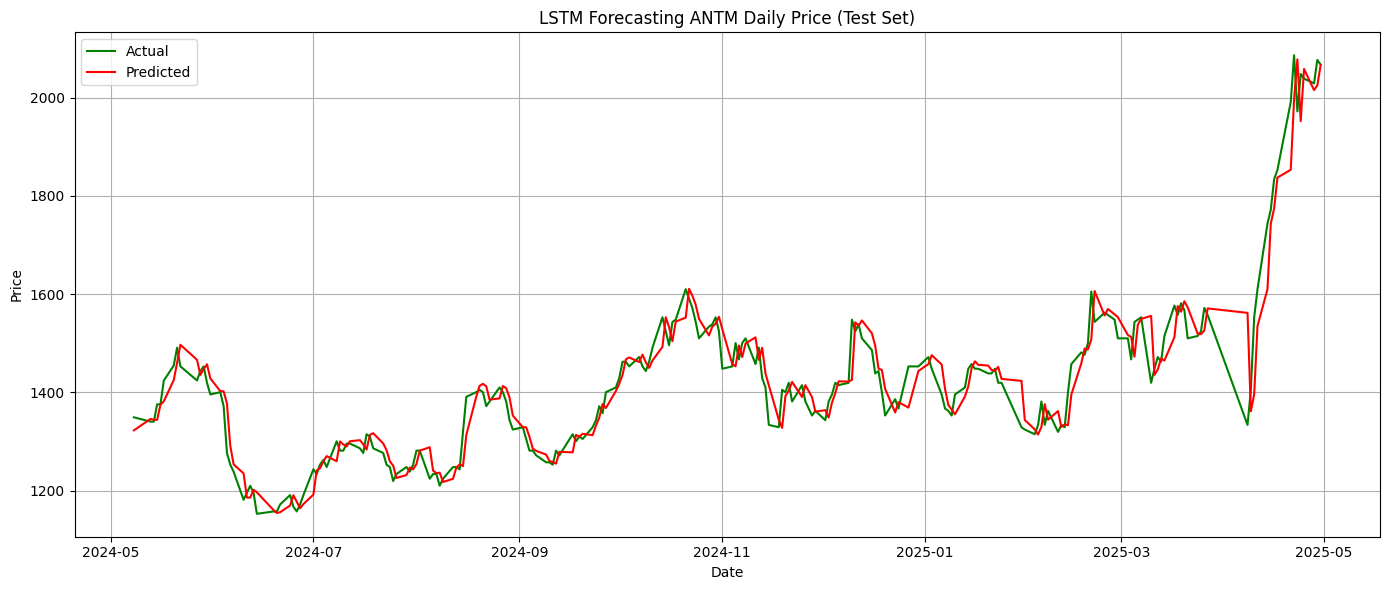

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ================================
# 1. Raw Data
# ================================
data = yf.download('ANTM.JK', start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

# ================================
# 2. Normalisasi
# ================================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ================================
# 3. Buat dataset untuk model
# ================================
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 30
X, y = create_dataset(scaled_data, time_step)

dates = data.index[time_step:]

X = X.reshape((X.shape[0], X.shape[1], 1))

# ================================
# 4. Split Dataset (75% train, 25% test)
# ================================
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]

learning_rate = 0.005
optimizer = Adam(learning_rate=learning_rate)

# ================================
# 5. Model LSTM
# ================================
model = load_model('best_lstm_ANTM.JK.keras')

# ================================
# 6. Evaluasi Model
# ================================
y_pred = model.predict(X_test)

# Inverse transform (kembalikan ke skala harga asli)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)
print(y_pred_inv)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAPE:", mape)

# ================================
# 7. Plot
# ================================
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test_inv, label='Actual', color='green')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Forecasting ANTM Daily Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

BBNI.JK

[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
RMSE: 110.79808547369613
MAPE: 0.020070233407887314


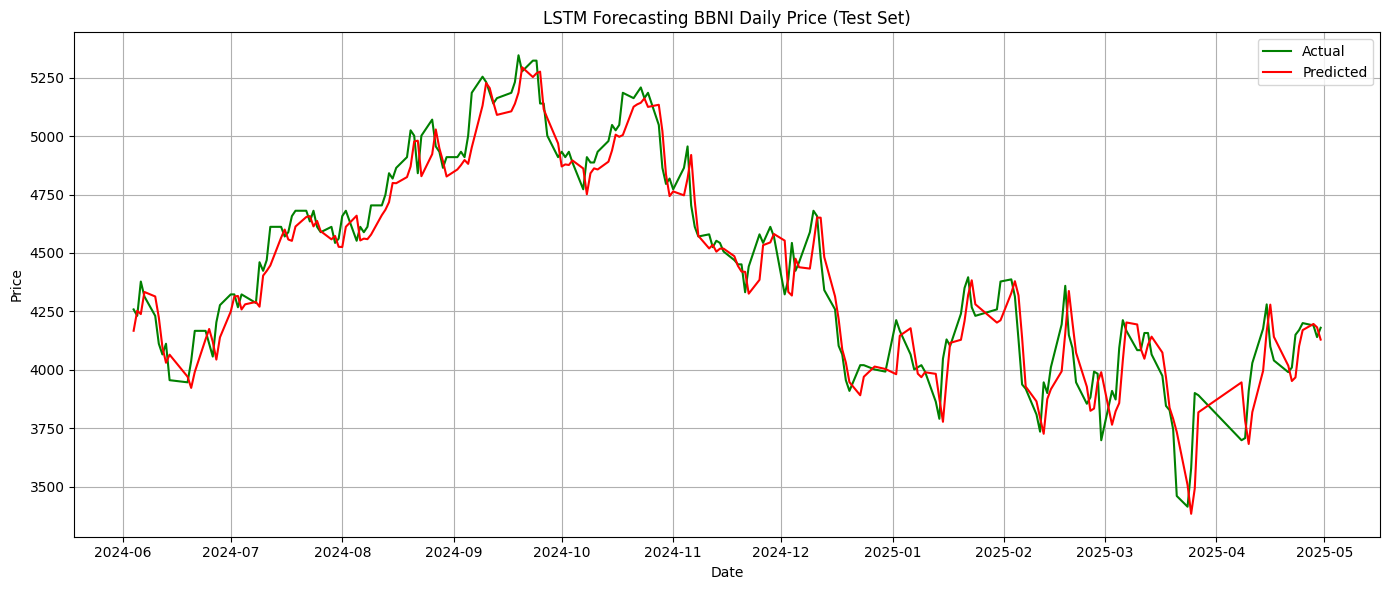

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ================================
# 1. Raw Data
# ================================
data = yf.download('BBNI.JK', start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

# ================================
# 2. Normalisasi
# ================================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ================================
# 3. Buat dataset untuk model
# ================================
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 90
X, y = create_dataset(scaled_data, time_step)

dates = data.index[time_step:]

X = X.reshape((X.shape[0], X.shape[1], 1))

# ================================
# 4. Split Dataset (75% train, 25% test)
# ================================
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]

learning_rate = 0.005
optimizer = Adam(learning_rate=learning_rate)

# ================================
# 5. Model LSTM
# ================================
model = load_model('best_lstm_BBNI.JK.keras')

# ================================
# 6. Evaluasi Model
# ================================
y_pred = model.predict(X_test)

# Inverse transform (kembalikan ke skala harga asli)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAPE:", mape)

# ================================
# 7. Plot
# ================================
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test_inv, label='Actual', color='green')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Forecasting BBNI Daily Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

BBRI.JK

[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
RMSE: 91.82497455253785
MAPE: 0.01759843205972451


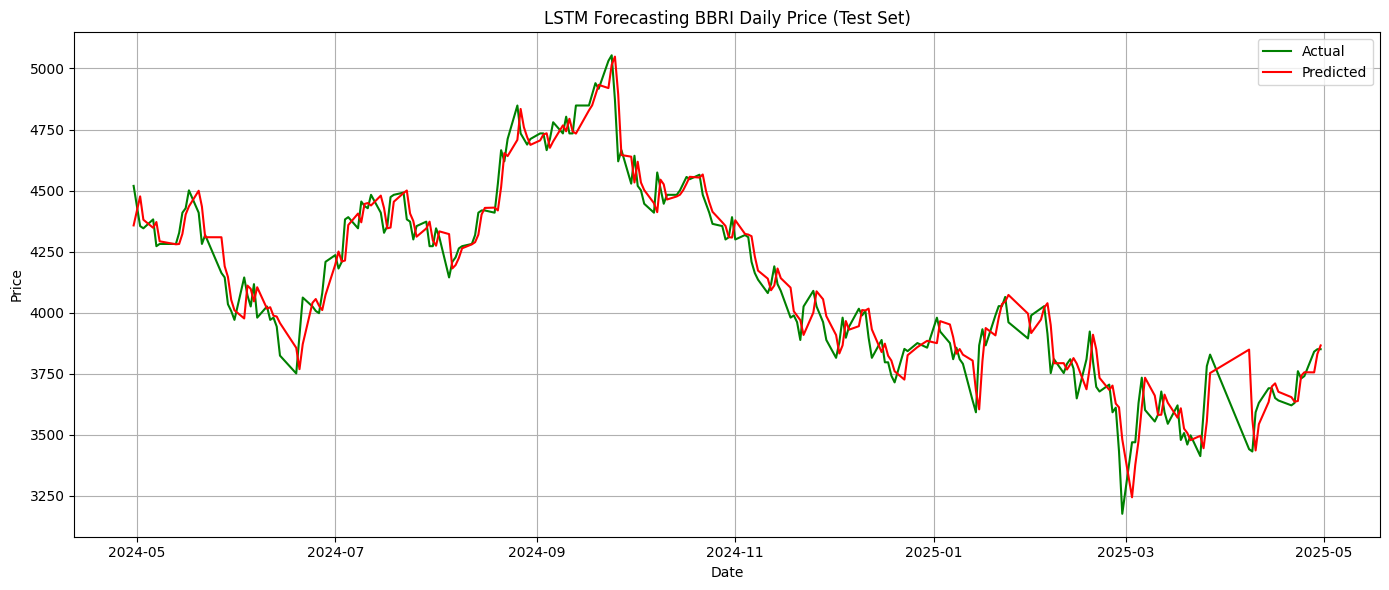

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ================================
# 1. Raw Data
# ================================
data = yf.download('BBRI.JK', start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

# ================================
# 2. Normalisasi
# ================================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ================================
# 3. Buat dataset untuk model
# ================================
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

dates = data.index[time_step:]

X = X.reshape((X.shape[0], X.shape[1], 1))

# ================================
# 4. Split Dataset (75% train, 25% test)
# ================================
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]

learning_rate = 0.005
optimizer = Adam(learning_rate=learning_rate)

# ================================
# 5. Model LSTM
# ================================
model = load_model('best_lstm_BBRI.JK.keras')

# ================================
# 6. Evaluasi Model
# ================================
y_pred = model.predict(X_test)

# Inverse transform (kembalikan ke skala harga asli)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAPE:", mape)

# ================================
# 7. Plot
# ================================
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test_inv, label='Actual', color='green')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Forecasting BBRI Daily Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

BMRI.JK

[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
RMSE: 129.35621142287556
MAPE: 0.018676541590464724


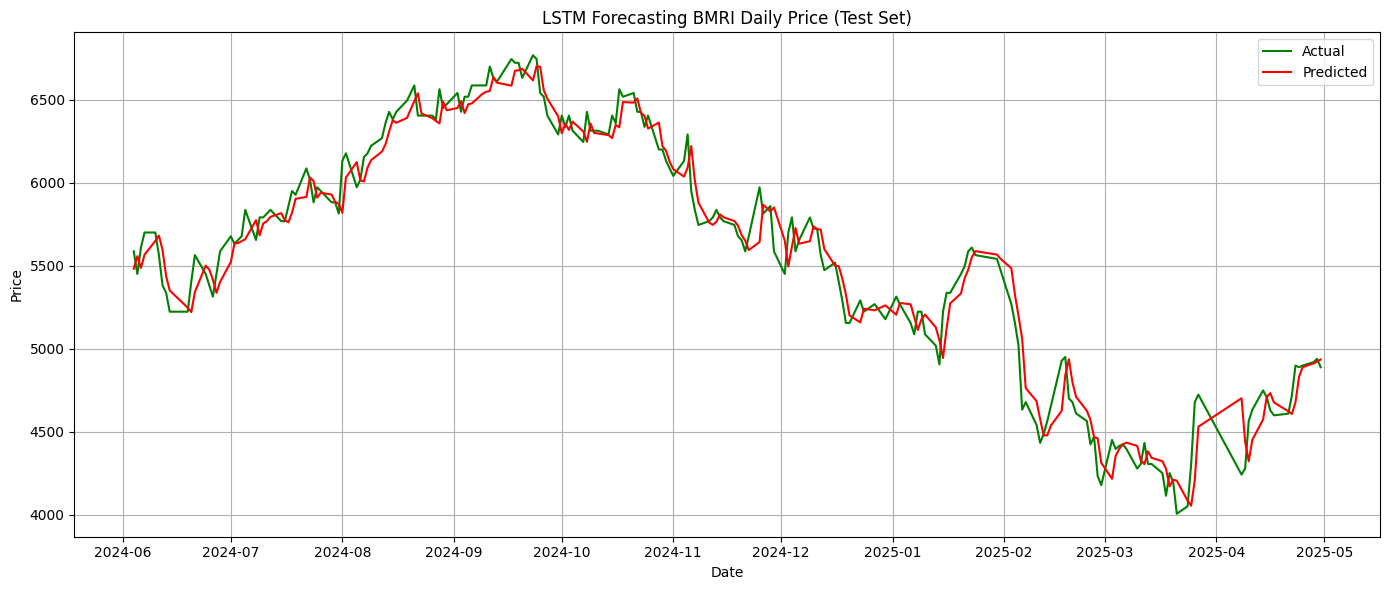

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ================================
# 1. Raw Data
# ================================
data = yf.download('BMRI.JK', start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

# ================================
# 2. Normalisasi
# ================================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ================================
# 3. Buat dataset untuk model
# ================================
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 90
X, y = create_dataset(scaled_data, time_step)

dates = data.index[time_step:]

X = X.reshape((X.shape[0], X.shape[1], 1))

# ================================
# 4. Split Dataset (75% train, 25% test)
# ================================
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]

learning_rate = 0.005
optimizer = Adam(learning_rate=learning_rate)

# ================================
# 5. Model LSTM
# ================================
model = load_model('best_lstm_BMRI.JK.keras')

# ================================
# 6. Evaluasi Model
# ================================
y_pred = model.predict(X_test)

# Inverse transform (kembalikan ke skala harga asli)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAPE:", mape)

# ================================
# 7. Plot
# ================================
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test_inv, label='Actual', color='green')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Forecasting BMRI Daily Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

TLKM.JK

[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RMSE: 58.8143888159104
MAPE: 0.01739568124415499


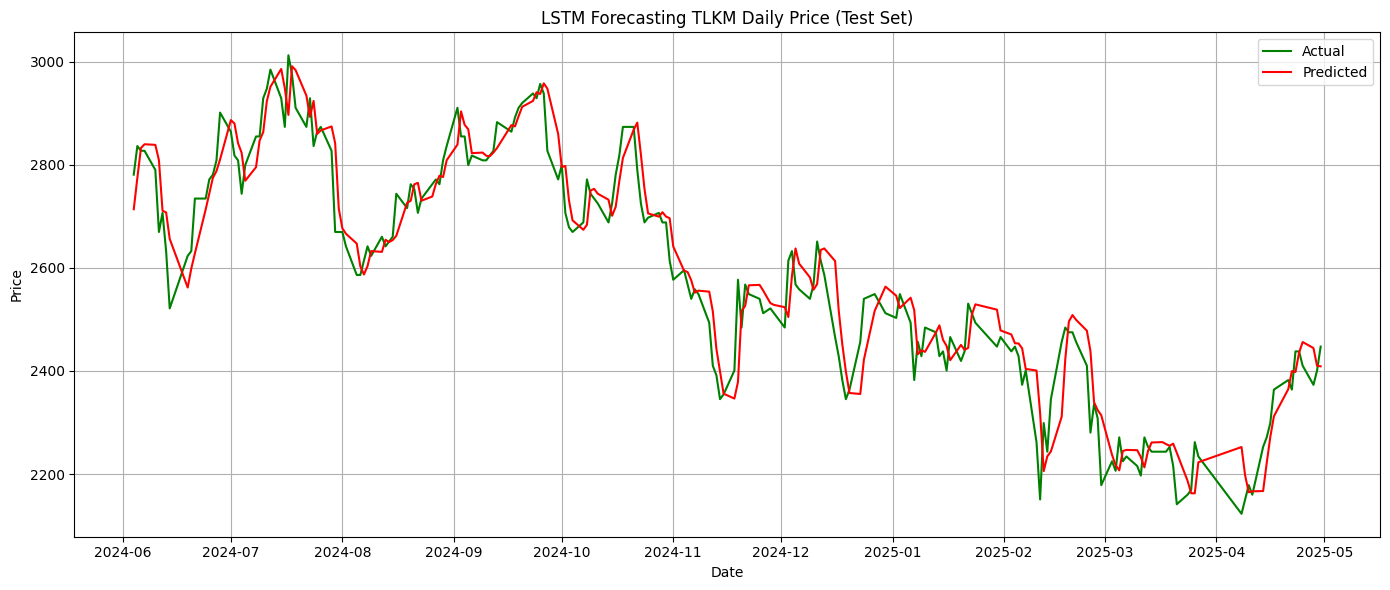

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ================================
# 1. Raw Data
# ================================
data = yf.download('TLKM.JK', start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

# ================================
# 2. Normalisasi
# ================================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ================================
# 3. Buat dataset untuk model
# ================================
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 90
X, y = create_dataset(scaled_data, time_step)

dates = data.index[time_step:]

X = X.reshape((X.shape[0], X.shape[1], 1))

# ================================
# 4. Split Dataset (75% train, 25% test)
# ================================
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]

learning_rate = 0.005
optimizer = Adam(learning_rate=learning_rate)

# ================================
# 5. Model LSTM
# ================================
model = load_model('best_lstm_TLKM.JK.keras')

# ================================
# 6. Evaluasi Model
# ================================
y_pred = model.predict(X_test)

# Inverse transform (kembalikan ke skala harga asli)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAPE:", mape)

# ================================
# 7. Plot
# ================================
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test_inv, label='Actual', color='green')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Forecasting TLKM Daily Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Klasifikasi Buy Hold Sell

# Simulasi 30 hari

In [3]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, accuracy_score, confusion_matrix, classification_report

from keras.models import load_model
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stocks = ['ANTM.JK', 'BBNI.JK', 'BBRI.JK', 'BMRI.JK', 'TLKM.JK']
time_steps_list = [30, 90, 10, 90, 90]

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

for i, stock in enumerate(stocks):
  print(f"\n\n================================== {stock} ==================================\n")

  # ================================
  # 1. Raw Data
  # ================================
  data = yf.download(stock, start='2021-05-01', end='2025-05-01')
  data = data[['Close']].dropna()
  data.rename(columns={'Close': 'Price'}, inplace=True)

  # ================================
  # 2. Normalisasi
  # ================================
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)

  # ================================
  # 3. Buat dataset untuk model
  # ================================
  time_step = time_steps_list[i]
  X, y = create_dataset(scaled_data, time_step)

  dates = data.index[time_step:]
  X = X.reshape((X.shape[0], X.shape[1], 1))

  # ================================
  # 4. Split Dataset (75% train, 25% test)
  # ================================
  train_size = int(len(X) * 0.75)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]
  dates_train, dates_test = dates[:train_size], dates[train_size:]

  # ================================
  # 5. Load Model LSTM
  # ================================
  model = load_model("best_lstm_"+stock+".keras")

  # ================================
  # 6. Evaluasi Model
  # ================================
  y_pred = model.predict(X_test)

  y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
  y_pred_inv = scaler.inverse_transform(y_pred)

  # rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
  # mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

  # print("RMSE:", rmse)
  # print("MAPE:", mape)

  # plt.figure(figsize=(10, 5))
  # plt.plot(dates_test[-30:], y_test_inv[-30:], label="Actual", color='green', marker='o', linewidth=2)
  # plt.plot(dates_test[-30:], y_pred_inv[-30:], label="Predicted", color='red', marker='o', linewidth=2)
  # plt.title(f"{stock} - Actual vs Predicted (30 Hari Terakhir)")
  # plt.xlabel("Date")
  # plt.ylabel("Price")
  # plt.legend()
  # plt.grid(True, linestyle='--', alpha=0.5)
  # plt.tight_layout()
  # plt.show()

  # ================================
  # 7. Simulasi
  # ================================
  def simulate_profit(actual_prices, predicted_prices, thresholds, step_ahead=1, initial_balance=1000000):
    results = pd.DataFrame(index=[f"{lt*100:.0f}%" for lt in thresholds],
                           columns=[f"{ut*100:.0f}%" for ut in thresholds])

    # 30 data test terakhir
    actual = actual_prices[-30:].flatten()
    predicted = predicted_prices[-30:].flatten()

    for lt in thresholds:
      for ut in thresholds:
          # print("===================================================================")
          # print(f"LT: {lt*100:.0f}%, UT: {ut*100:.0f}%")
          cash = initial_balance
          shares = 0

          for i in range(len(predicted) - step_ahead):
              curr_price = actual[i]
              next_pred_price = predicted[i + step_ahead]
              change = (next_pred_price - curr_price) / curr_price

              # Buy jika prediksi naik lebih dari upper threshold
              if change >= ut and shares == 0:
                  shares = cash / curr_price
                  cash = 0
                  # print(i, " : Buy - ", change, " : Change")

              # Sell jika prediksi turun lebih dari lower threshold
              elif change <= -lt and shares > 0:
                  cash = shares * curr_price
                  shares = 0
                  # print(i, " : Sell - ", change, " : Change")

              else:
                  # print(i, " : Hold - ", change, " : Change")
                  continue

          # Sell jika masih ada di akhir
          if shares > 0:
              cash = shares * actual[-1]
              shares = 0

          total_return = (cash - initial_balance) / initial_balance * 100
          results.loc[f"{lt*100:.0f}%", f"{ut*100:.0f}%"] = total_return

    return results

  thresholds = [0.01, 0.02, 0.03, 0.04, 0.05]
  profit_matrix = simulate_profit(y_test_inv, y_pred_inv, thresholds)

  print(profit_matrix)

[*********************100%***********************]  1 of 1 completed



================================== ANTM.JK ==================================



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[*********************100%***********************]  1 of 1 completed

           1%         2%   3%   4%   5%
1%   9.395976  16.428569  0.0  0.0  0.0
2%  45.637584  54.999992  0.0  0.0  0.0
3%  45.637584  54.999992  0.0  0.0  0.0
4%  45.637584  54.999992  0.0  0.0  0.0
5%  45.637584  54.999992  0.0  0.0  0.0


================================== BBNI.JK ==================================



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


[*********************100%***********************]  1 of 1 completed

           1%         2%   3%   4%   5%
1%   1.654719   5.707201  0.0  0.0  0.0
2%   5.964271   5.707201  0.0  0.0  0.0
3%  20.806921  13.012928  0.0  0.0  0.0
4%  20.806921  13.012928  0.0  0.0  0.0
5%  20.806921  13.012928  0.0  0.0  0.0


================================== BBRI.JK ==================================



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[*********************100%***********************]  1 of 1 completed

          1%         2%         3%   4%   5%
1%    4.3956     4.3956     4.3956  0.0  0.0
2%  7.194569  11.906413  11.906413  0.0  0.0
3%  7.194569  11.906413  11.906413  0.0  0.0
4%  7.194569  11.906413  11.906413  0.0  0.0
5%  7.194569  11.906413  11.906413  0.0  0.0


================================== BMRI.JK ==================================



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[*********************100%***********************]  1 of 1 completed

           1%         2%         3%         4%   5%
1%  23.456317   7.601711   7.601711   7.601711  0.0
2%   14.36799   7.601711   7.601711   7.601711  0.0
3%  26.011379  15.245356  15.245356  15.245356  0.0
4%  14.266624  15.245356  15.245356  15.245356  0.0
5%  14.266624  15.245356  15.245356  15.245356  0.0


================================== TLKM.JK ==================================



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
           1%         2%        3%   4%   5%
1%  12.157016  12.085295  6.113541  0.0  0.0
2%  10.460249  14.285709  15.28384  0.0  0.0
3%  10.460249  14.285709  15.28384  0.0  0.0
4%  10.460249  14.285709  15.28384  0.0  0.0
5%  10.460249  14.285709  15.28384  0.0  0.0


# Buy Hold sell Simulasi

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import load_model
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stocks = ['ANTM.JK', 'BBNI.JK', 'BBRI.JK', 'BMRI.JK', 'TLKM.JK']
time_steps_list = [30, 90, 10, 90, 90]

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

def get_signal(actual_prices, future_prices, step_ahead=1, lower_threshold=0.05, upper_threshold=0.05):
  signals = []
  for i in range(len(actual_prices) - step_ahead):
      curr_price = actual_prices[i]
      future_price = future_prices[i + step_ahead]
      change = (future_price - curr_price) / curr_price

      if change >= upper_threshold:
          signals.append("Buy")
      elif change <= -lower_threshold:
          signals.append("Sell")
      else:
          signals.append("Hold")
  return signals

for i, stock in enumerate(stocks):
  print(f"\n\n================================== {stock} ==================================\n")
  # ================================
  # 1. Raw Data
  # ================================
  data = yf.download(stock, start='2021-05-01', end='2025-05-01')
  data = data[['Close']].dropna()
  data.rename(columns={'Close': 'Price'}, inplace=True)

  # ================================
  # 2. Normalisasi
  # ================================
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)

  # ================================
  # 3. Buat dataset untuk model
  # ================================
  time_step = time_steps_list[i]
  X, y = create_dataset(scaled_data, time_step)

  dates = data.index[time_step:]
  X = X.reshape((X.shape[0], X.shape[1], 1))

  # ================================
  # 4. Split Dataset (75% train, 25% test)
  # ================================
  train_size = int(len(X) * 0.75)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]
  dates_train, dates_test = dates[:train_size], dates[train_size:]

  # ================================
  # 5. Load Model LSTM
  # ================================
  model = load_model("best_lstm_"+stock+".keras")

  # ================================
  # 6. Evaluasi Model
  # ================================
  y_pred = model.predict(X_test)

  # Inverse transform
  y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
  y_pred_inv = scaler.inverse_transform(y_pred)

  rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
  mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

  print("RMSE:", rmse)
  print("MAPE:", mape)

  # ================================
  # 7. Rekomendasi Buy/Hold/Sell Aktual dan Prediksi
  # ================================
  step_ahead = 1
  thresholds = {
      "ANTM.JK": (0.02, 0.02),
      "BBNI.JK": (0.03, 0.01),
      "BBRI.JK": (0.02, 0.02),
      "BMRI.JK": (0.03, 0.01),
      "TLKM.JK": (0.02, 0.03)
  }

  y_test_inv = y_test_inv[-30:]
  y_pred_inv = y_pred_inv[-30:]

  dates_eval = dates_test[-30:]

  lt, ut = thresholds[stock]
  signals_pred = get_signal(y_test_inv.flatten(), y_pred_inv.flatten(), step_ahead, lt, ut)

  # ================================
  # 8. Export ke Excel
  # ================================
  output_file = "hasil_rekomendasi_lstm.xlsx"

  if i == 0:  # Jika sheet pertama → buat file baru
      mode = 'w'
  else:      # Sheet berikutnya → append
      mode = 'a'

  # Potong agar jumlah signal cocok
  dates_final = dates_eval[1:]
  actual_final = y_test_inv[:-1]
  pred_final = y_pred_inv[1:]

  # Hitung persentase perubahan aktual
  pct_change = ((actual_final - y_test_inv[:-1]) / y_test_inv[:-1]) * 100

  df_out = pd.DataFrame({
      "Tanggal": dates_final,
      "Harga Aktual": actual_final.flatten(),
      "% Perubahan": pct_change.flatten(),
      "Signal Sistem": signals_pred,
      "Signal Ahli": "",
      "Alasan Ahli": ""
  })

  with pd.ExcelWriter(output_file, engine="openpyxl", mode=mode) as writer:
      df_out.to_excel(writer, sheet_name=stock.replace(".JK",""), index=False)

  print(f"➡ Data untuk {stock} berhasil disimpan ke sheet Excel!")

[*********************100%***********************]  1 of 1 completed



================================== ANTM.JK ==================================



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
RMSE: 42.25911181671726
MAPE: 0.020365930451763017
➡ Data untuk ANTM.JK berhasil disimpan ke sheet Excel!


================================== BBNI.JK ==================================



[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
RMSE: 110.79808547369613
MAPE: 0.020070233407887314
➡ Data untuk BBNI.JK berhasil disimpan ke sheet Excel!


================================== BBRI.JK ==================================



[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
RMSE: 91.82498364396959
MAPE: 0.017598434901391832
➡ Data untuk BBRI.JK berhasil disimpan ke sheet Excel!


================================== BMRI.JK ==================================



[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
RMSE: 129.35618420912522
MAPE: 0.018676533879336463
➡ Data untuk BMRI.JK berhasil disimpan ke sheet Excel!


================================== TLKM.JK ==================================



[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
RMSE: 58.81438122200986
MAPE: 0.01739568412217502
➡ Data untuk TLKM.JK berhasil disimpan ke sheet Excel!


# Confusion Matrix

Ahli

In [5]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, confusion_matrix, classification_report, accuracy_score

from keras.models import load_model
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stocks = ['ANTM.JK', 'BBNI.JK', 'BBRI.JK', 'BMRI.JK', 'TLKM.JK']
time_steps_list = [30, 90, 10, 90, 90]

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

def get_signal(actual_prices, future_prices, step_ahead=1, lower_threshold=0.05, upper_threshold=0.05):
  signals = []
  for i in range(len(actual_prices) - step_ahead):
      curr_price = actual_prices[i]
      future_price = future_prices[i + step_ahead]
      change = (future_price - curr_price) / curr_price

      if change >= upper_threshold:
          signals.append("Buy")
      elif change <= -lower_threshold:
          signals.append("Sell")
      else:
          signals.append("Hold")
  return signals

expert_signals_dict = {
  "ANTM.JK": [
      "Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Buy",
      "Hold","Hold","Hold","Hold","Buy","Hold","Hold","Hold","Hold","Hold",
      "Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold"
  ],
  "BBNI.JK": [
    "Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Buy",
    "Hold","Hold","Hold","Hold","Buy","Hold","Hold","Hold","Hold","Sell",
    "Buy","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold"
],
  "BBRI.JK": [
    "Hold","Hold","Hold","Hold","Hold","Hold","Buy","Hold","Hold","Hold",
    "Hold","Hold","Hold","Hold","Buy","Hold","Hold","Hold","Hold","Hold",
    "Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold", "Hold"
],
  "BMRI.JK": [
    "Buy","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Buy",
    "Hold","Hold","Sell","Hold","Buy","Buy","Hold","Hold","Hold","Hold",
    "Hold","Hold","Hold","Hold","Sell","Hold","Hold","Hold","Hold"
],
  "TLKM.JK": [
    "Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Sell",
    "Hold","Hold","Hold","Hold","Buy","Hold","Hold","Hold","Sell","Hold",
    "Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold"
  ]
}


for i, stock in enumerate(stocks):
  print(f"\n\n================================== {stock} ==================================\n")
  # ================================
  # 1. Raw Data
  # ================================
  data = yf.download(stock, start='2021-05-01', end='2025-05-01')
  data = data[['Close']].dropna()
  data.rename(columns={'Close': 'Price'}, inplace=True)

  # ================================
  # 2. Normalisasi
  # ================================
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)

  # ================================
  # 3. Buat dataset untuk model
  # ================================
  time_step = time_steps_list[i]
  X, y = create_dataset(scaled_data, time_step)

  dates = data.index[time_step:]
  X = X.reshape((X.shape[0], X.shape[1], 1))

  # ================================
  # 4. Split Dataset (75% train, 25% test)
  # ================================
  train_size = int(len(X) * 0.75)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]
  dates_train, dates_test = dates[:train_size], dates[train_size:]

  # ================================
  # 5. Load Model LSTM
  # ================================
  model = load_model("best_lstm_"+stock+".keras")

  # ================================
  # 6. Evaluasi Model
  # ================================
  y_pred = model.predict(X_test)

  # Inverse transform
  y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
  y_pred_inv = scaler.inverse_transform(y_pred)

  # rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
  # mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

  # print("RMSE:", rmse)
  # print("MAPE:", mape)

  # ================================
  # 7. Rekomendasi Buy/Hold/Sell Aktual dan Prediksi
  # ================================
  step_ahead = 1
  thresholds = {
      "ANTM.JK": (0.02, 0.02),
      "BBNI.JK": (0.03, 0.01),
      "BBRI.JK": (0.02, 0.02),
      "BMRI.JK": (0.03, 0.01),
      "TLKM.JK": (0.02, 0.03)
  }

  y_test_inv = y_test_inv[-30:]
  y_pred_inv = y_pred_inv[-30:]

  dates_eval = dates_test[-30:]

  lt, ut = thresholds[stock]
  signals_pred = get_signal(y_test_inv.flatten(), y_pred_inv.flatten(), step_ahead, lt, ut)

  # ================================
  # 8. Confusion Matrix
  # ================================
  expert_signals = expert_signals_dict[stock]

  cm = confusion_matrix(expert_signals, signals_pred, labels=["Buy","Hold","Sell"])
  print("Confusion Matrix:")
  print(cm)

  print("\nClassification Report:")
  print(classification_report(expert_signals, signals_pred, labels=["Buy","Hold","Sell"]))

  acc = accuracy_score(expert_signals, signals_pred)
  print(f"Accuracy: {acc:.4f}")

[*********************100%***********************]  1 of 1 completed



================================== ANTM.JK ==================================



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Confusion Matrix:
[[ 1  1  0]
 [ 0 27  0]
 [ 0  0  0]]

Classification Report:
              precision    recall  f1-score   support

         Buy       1.00      0.50      0.67         2
        Hold       0.96      1.00      0.98        27
        Sell       0.00      0.00      0.00         0

    accuracy                           0.97        29
   macro avg       0.65      0.50      0.55        29
weighted avg       0.97      0.97      0.96        29

Accuracy: 0.9655


================================== BBNI.JK ==================================



[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[ 3  0  0]
 [ 1 24  0]
 [ 0  1  0]]

Classification Report:
              precision    recall  f1-score   support

         Buy       0.75      1.00      0.86         3
        Hold       0.96      0.96      0.96        25
        Sell       0.00      0.00      0.00         1

    accuracy                           0.93        29
   macro avg       0.57      0.65      0.61        29
weighted avg       0.91      0.93      0.92        29

Accuracy: 0.9310


================================== BBRI.JK ==================================



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[ 1  1  0]
 [ 0 27  0]
 [ 0  0  0]]

Classification Report:
              precision    recall  f1-score   support

         Buy       1.00      0.50      0.67         2
        Hold       0.96      1.00      0.98        27
        Sell       0.00      0.00      0.00         0

    accuracy                           0.97        29
   macro avg       0.65      0.50      0.55        29
weighted avg       0.97      0.97      0.96        29

Accuracy: 0.9655


================================== BMRI.JK ==================================



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Confusion Matrix:
[[ 4  0  0]
 [ 2 21  0]
 [ 0  1  1]]

Classification Report:
              precision    recall  f1-score   support

         Buy       0.67      1.00      0.80         4
        Hold       0.95      0.91      0.93        23
        Sell       1.00      0.50      0.67         2

    accuracy                           0.90        29
   macro avg       0.87      0.80      0.80        29
weighted avg       0.92      0.90      0.90        29

Accuracy: 0.8966


================================== TLKM.JK ==================================



[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Confusion Matrix:
[[ 1  0  0]
 [ 0 26  0]
 [ 0  2  0]]

Classification Report:
              precision    recall  f1-score   support

         Buy       1.00      1.00      1.00         1
        Hold       0.93      1.00      0.96        26
        Sell       0.00      0.00      0.00         2

    accuracy                           0.93        29
   macro avg       0.64      0.67      0.65        29
weighted avg       0.87      0.93      0.90        29

Accuracy: 0.9310


Actual

[*********************100%***********************]  1 of 1 completed



================================== ANTM.JK ==================================



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
RMSE: 42.259110170569045
MAPE: 0.020365928341540617

Akurasi sinyal Buy/Hold/Sell: 0.646551724137931

Classification Report:
              precision    recall  f1-score   support

         Buy       1.00      0.02      0.04        49
        Hold       0.65      1.00      0.78       149
        Sell       0.00      0.00      0.00        34

    accuracy                           0.65       232
   macro avg       0.55      0.34      0.27       232
weighted avg       0.63      0.65      0.51       232


Confusion Matrix:
[[  1  48   0]
 [  0 149   0]
 [  0  34   0]]


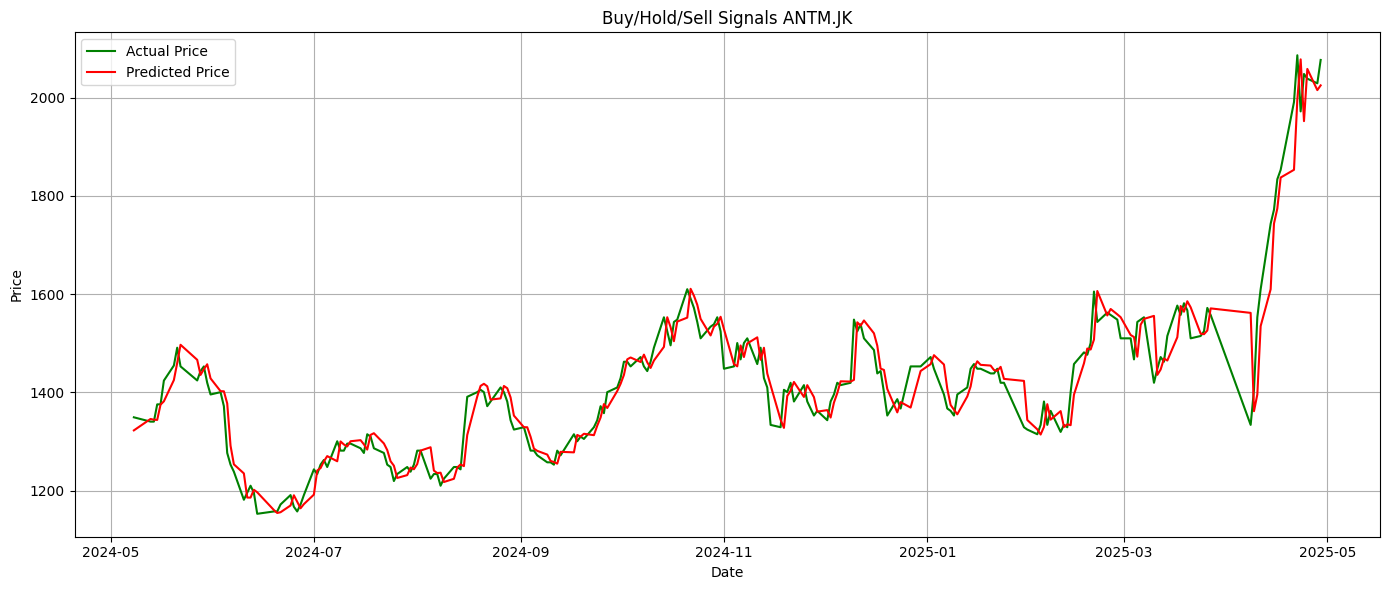

[*********************100%***********************]  1 of 1 completed



================================== BBNI.JK ==================================



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
RMSE: 110.79811725190092
MAPE: 0.0200702374064999

Akurasi sinyal Buy/Hold/Sell: 0.6267281105990783

Classification Report:
              precision    recall  f1-score   support

         Buy       0.17      0.02      0.03        59
        Hold       0.64      0.97      0.77       139
        Sell       0.00      0.00      0.00        19

    accuracy                           0.63       217
   macro avg       0.27      0.33      0.27       217
weighted avg       0.46      0.63      0.50       217


Confusion Matrix:
[[  1  58   0]
 [  4 135   0]
 [  1  18   0]]


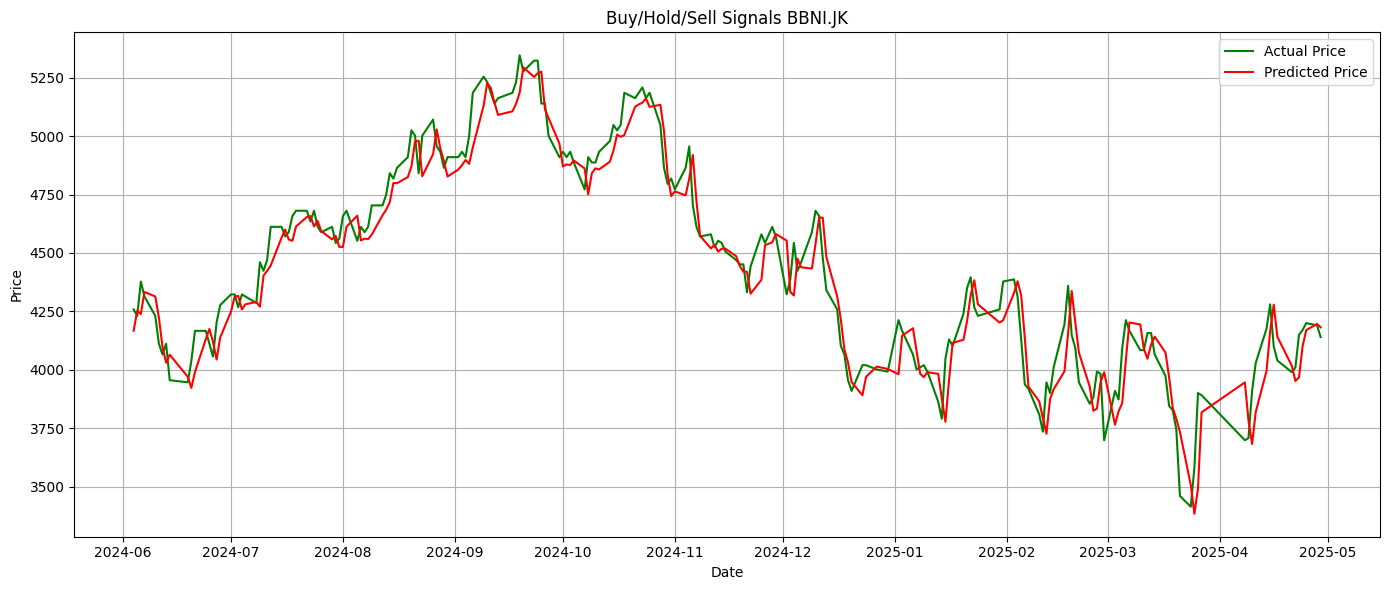

[*********************100%***********************]  1 of 1 completed



================================== BBRI.JK ==================================



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
RMSE: 91.8249953704174
MAPE: 0.017598436916179915

Akurasi sinyal Buy/Hold/Sell: 0.6835443037974683

Classification Report:
              precision    recall  f1-score   support

         Buy       0.50      0.03      0.05        36
        Hold       0.69      0.99      0.81       163
        Sell       0.00      0.00      0.00        38

    accuracy                           0.68       237
   macro avg       0.40      0.34      0.29       237
weighted avg       0.55      0.68      0.57       237


Confusion Matrix:
[[  1  35   0]
 [  1 161   1]
 [  0  38   0]]


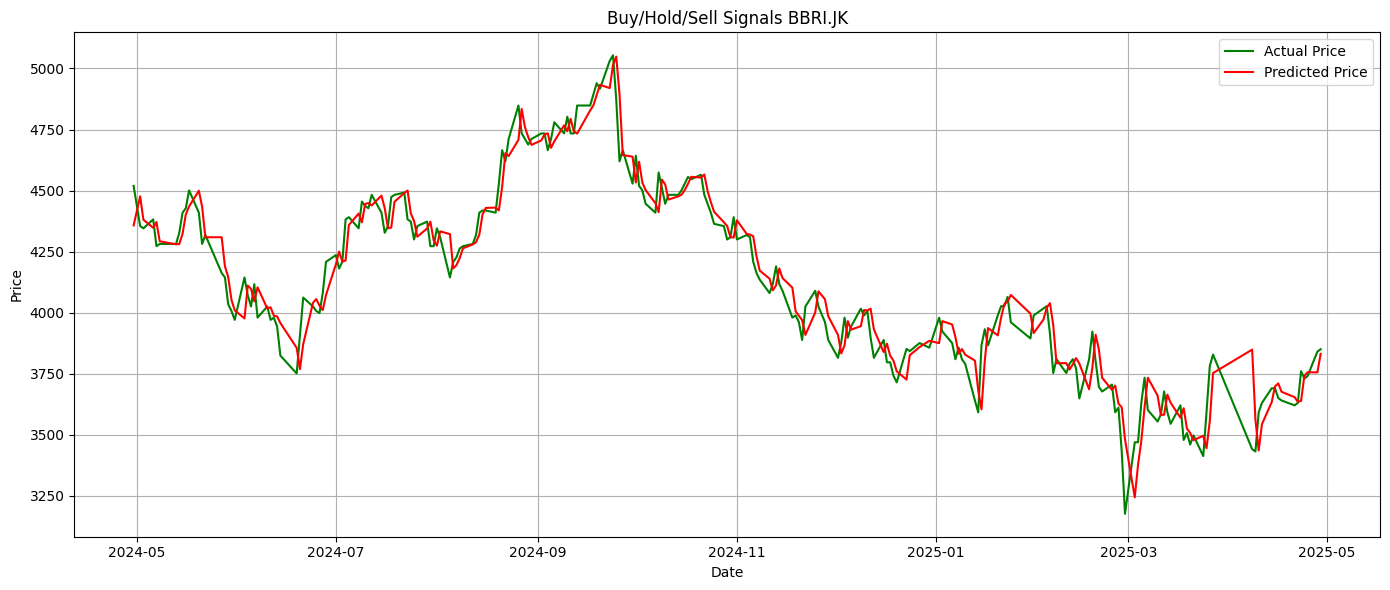

[*********************100%***********************]  1 of 1 completed



================================== BMRI.JK ==================================

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
RMSE: 129.356189152665
MAPE: 0.018676535046402706

Akurasi sinyal Buy/Hold/Sell: 0.6082949308755761

Classification Report:
              precision    recall  f1-score   support

         Buy       0.29      0.06      0.11        62
        Hold       0.63      0.92      0.75       139
        Sell       0.00      0.00      0.00        16

    accuracy                           0.61       217
   macro avg       0.31      0.33      0.29       217
weighted avg       0.49      0.61      0.51       217


Confusion Matrix:
[[  4  58   0]
 [ 10 128   1]
 [  0  16   0]]


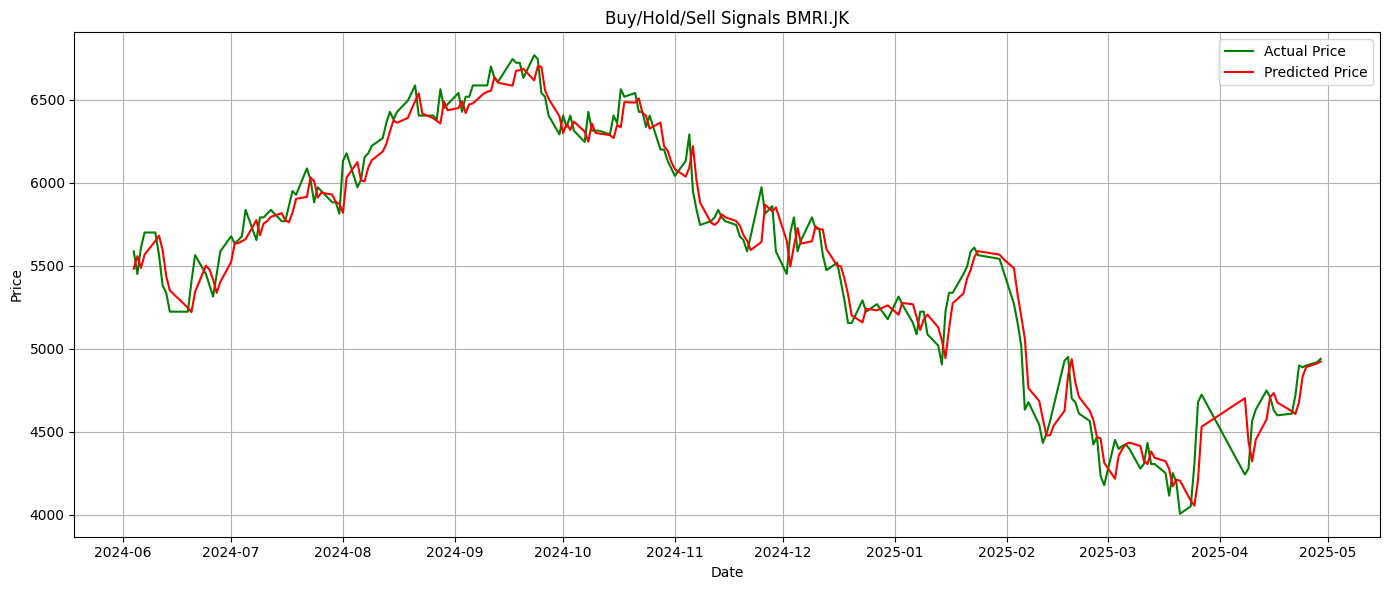

[*********************100%***********************]  1 of 1 completed



================================== TLKM.JK ==================================

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
RMSE: 58.814389536724036
MAPE: 0.017395682842918793

Akurasi sinyal Buy/Hold/Sell: 0.7741935483870968

Classification Report:
              precision    recall  f1-score   support

         Buy       0.00      0.00      0.00        21
        Hold       0.78      0.99      0.87       167
        Sell       1.00      0.07      0.13        29

    accuracy                           0.77       217
   macro avg       0.59      0.35      0.33       217
weighted avg       0.73      0.77      0.69       217


Confusion Matrix:
[[  0  21   0]
 [  1 166   0]
 [  0  27   2]]


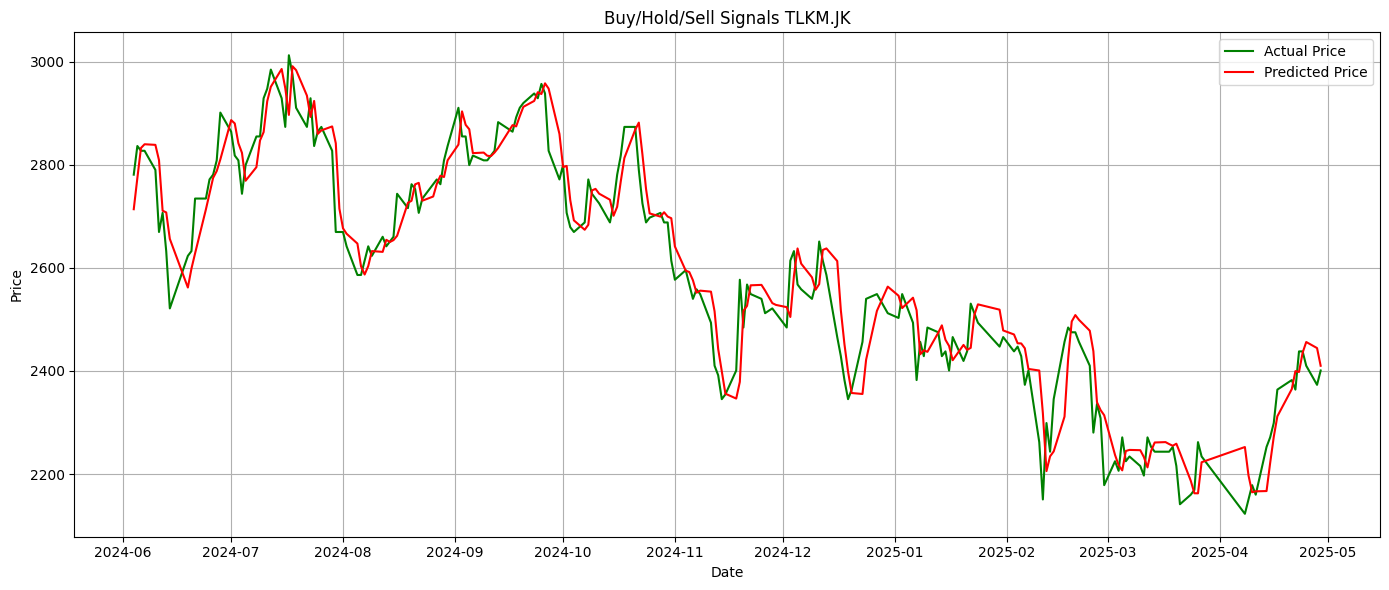

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, accuracy_score, confusion_matrix, classification_report

from keras.models import load_model
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stocks = ['ANTM.JK', 'BBNI.JK', 'BBRI.JK', 'BMRI.JK', 'TLKM.JK']
time_steps_list = [30, 90, 10, 90, 90]

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

def get_signal(actual_prices, future_prices, step_ahead=1, lower_threshold=0.05, upper_threshold=0.05):
  signals = []
  for i in range(len(actual_prices) - step_ahead):
      curr_price = actual_prices[i]
      future_price = future_prices[i + step_ahead]
      change = (future_price - curr_price) / curr_price

      if change >= upper_threshold:
          signals.append("Buy")
      elif change <= -lower_threshold:
          signals.append("Sell")
      else:
          signals.append("Hold")
  return signals

for i, stock in enumerate(stocks):
  print(f"\n\n================================== {stock} ==================================\n")
  # ================================
  # 1. Raw Data
  # ================================
  data = yf.download(stock, start='2021-05-01', end='2025-05-01')
  data = data[['Close']].dropna()
  data.rename(columns={'Close': 'Price'}, inplace=True)

  # ================================
  # 2. Normalisasi
  # ================================
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)

  # ================================
  # 3. Buat dataset untuk model
  # ================================
  time_step = time_steps_list[i]
  X, y = create_dataset(scaled_data, time_step)

  dates = data.index[time_step:]
  X = X.reshape((X.shape[0], X.shape[1], 1))

  # ================================
  # 4. Split Dataset (75% train, 25% test)
  # ================================
  train_size = int(len(X) * 0.75)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]
  dates_train, dates_test = dates[:train_size], dates[train_size:]

  # ================================
  # 5. Load Model LSTM
  # ================================
  model = load_model("best_lstm_"+stock+".keras")

  # ================================
  # 6. Evaluasi Model
  # ================================
  y_pred = model.predict(X_test)

  # Inverse transform
  y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
  y_pred_inv = scaler.inverse_transform(y_pred)

  rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
  mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

  print("RMSE:", rmse)
  print("MAPE:", mape)

  # ================================
  # 7. Rekomendasi Buy/Hold/Sell Aktual dan Prediksi
  # ================================
  step_ahead = 1
  thresholds = {
      "ANTM.JK": (0.02, 0.02),
      "BBNI.JK": (0.03, 0.01),
      "BBRI.JK": (0.02, 0.02),
      "BMRI.JK": (0.03, 0.01),
      "TLKM.JK": (0.02, 0.03)
  }

  # thresholds = {
  #     "ANTM.JK": (0.05, 0.05),
  #     "BBNI.JK": (0.05, 0.05),
  #     "BBRI.JK": (0.05, 0.05),
  #     "BMRI.JK": (0.05, 0.05),
  #     "TLKM.JK": (0.05, 0.05)
  # }

  # y_test_inv = y_test_inv[-30:]
  # y_pred_inv = y_pred_inv[-30:]

  lt, ut = thresholds[stock]
  signals_actual = get_signal(y_test_inv.flatten(), y_test_inv.flatten(), step_ahead, lt, ut)
  signals_pred = get_signal(y_test_inv.flatten(), y_pred_inv.flatten(), step_ahead, lt, ut)

  dates_eval = dates_test[:-step_ahead]

  # ================================
  # 8. Evaluasi akurasi sinyal
  # ================================
  accuracy = accuracy_score(signals_actual, signals_pred)
  print("\nAkurasi sinyal Buy/Hold/Sell:", accuracy)

  print("\nClassification Report:")
  print(classification_report(signals_actual, signals_pred))

  print("\nConfusion Matrix:")
  print(confusion_matrix(signals_actual, signals_pred))

  # ================================
  # 9. Plot hasil
  # ================================
  plt.figure(figsize=(14,6))
  plt.plot(dates_eval, y_test_inv[:-step_ahead], label='Actual Price', color='green')
  plt.plot(dates_eval, y_pred_inv[:-step_ahead], label='Predicted Price', color='red')
  plt.title("Buy/Hold/Sell Signals "+stock)
  plt.xlabel("Date")
  plt.ylabel("Price")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

### Real Time

In [ ]:
%%time

import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import pytz

from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from datetime import datetime, timedelta

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ================================
# 1. Load data terbaru
# ================================
tz = pytz.timezone('Asia/Jakarta')
ticker = 'ANTM.JK'
end_date = datetime.now(tz)
start_date = end_date - timedelta(days=365 * 2)

data = yf.download(ticker, start=start_date, end=end_date)
print(data.tail())
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

# ================================
# 2. Normalisasi
# ================================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ================================
# 3. Time step terakhir
# ================================
time_step = 30
last_30_days = scaled_data[-time_step:]
X_input = np.array(last_30_days).reshape(1, time_step, 1)

# ================================
# 4. Load model
# ================================
model = load_model('best_lstm_ANTM.JK.keras')

# ================================
# 5. Prediksi harga besok
# ================================
next_day_scaled = model.predict(X_input)
predicted_price = scaler.inverse_transform(next_day_scaled)[0][0]

# ================================
# 6. Harga sekarang
# ================================
info = yf.Ticker(ticker).info
current_price = info.get("regularMarketPrice", None)


# ================================
# 7. Klasifikasi rekomendasi
# ================================
change_percent = ((predicted_price - current_price) / current_price) * 100

if change_percent >= 5:
    recommendation = "BUY"
elif change_percent <= -5:
    recommendation = "SELL"
else:
    recommendation = "HOLD"

print(f"\nPrediksi Saham {ticker}")
print(f"Tanggal Sekarang  : {end_date.date()}")
print(f"Harga Saat Ini    : Rp {current_price:,.2f}")
print(f"Prediksi Besok    : Rp {predicted_price:,.2f}")
print(f"Perubahan (%)     : {change_percent:.2f}%")
print(f"Rekomendasi       : {recommendation}")

<timed exec>:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed


Price        Close    High     Low    Open    Volume
Ticker     ANTM.JK ANTM.JK ANTM.JK ANTM.JK   ANTM.JK
Date                                                
2025-10-29  3200.0  3220.0  3110.0  3110.0  91690700
2025-10-30  3120.0  3210.0  3120.0  3200.0  93691300
2025-10-31  3100.0  3180.0  3100.0  3160.0  92327900
2025-11-03  3110.0  3130.0  3080.0  3100.0  56974500
2025-11-04  3030.0  3110.0  3020.0  3110.0  65715300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

Prediksi Saham ANTM.JK
Tanggal Sekarang  : 2025-11-04
Harga Saat Ini    : Rp 3,030.00
Prediksi Besok    : Rp 2,988.28
Perubahan (%)     : -1.38%
Rekomendasi       : HOLD
CPU times: user 332 ms, sys: 4.43 ms, total: 336 ms
Wall time: 609 ms
